<a href="https://colab.research.google.com/github/hari2301/Classification-of-earthquake-early-warning/blob/main/EEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
data_gps=pd.read_csv('/content/drive/MyDrive/Data Science/datasets/Dataset_GPS',delimiter=' ')
data_ses=pd.read_csv('/content/drive/MyDrive/Data Science/datasets/Dataset_Seismometers',delimiter=' ')
data_gps

,event_id,event_time,event_magnitude,event_latitude,event_longitude,event_depth,mts_id,station,station_latitude,station_longitude,timestamp,dimension_E,dimension_N,dimension_Z,label
0,0,2004-09-28T171524,6.0,35.815,-120.37,7.9,0,CAND,35.9394,-120.4337,1096391724,-15100.000000,52600.000000,28100.000000,large
1,0,2004-09-28T171524,6.0,35.815,-120.37,7.9,0,CAND,35.9394,-120.4337,1096391725,-14100.000000,51900.000000,23300.000000,large
2,0,2004-09-28T171524,6.0,35.815,-120.37,7.9,0,CAND,35.9394,-120.4337,1096391726,-8500.000000,51300.000000,20900.000000,large
3,0,2004-09-28T171524,6.0,35.815,-120.37,7.9,0,CAND,35.9394,-120.4337,1096391727,3500.000000,37600.000000,11100.000000,large
4,0,2004-09-28T171524,6.0,35.815,-120.37,7.9,0,CAND,35.9394,-120.4337,1096391728,4700.000000,48400.000000,8900.000000,large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124315,268,2018-11-26T005225,0.0,0.000,0.00,0.0,2071,330blsa,0.0000,0.0000,1543193600,-0.193384,0.074501,-0.045355,normal
124316,268,2018-11-26T005225,0.0,0.000,0.00,0.0,2071,330blsa,0.0000,0.0000,1543193601,-0.195025,0.082668,-0.043265,normal
124317,268,2018-11-26T005225,0.0,0.000,0.00,0.0,2071,330blsa,0.0000,0.0000,1543193602,-0.194118,0.078159,-0.044416,normal
124318,268,2018-11-26T005225,0.0,0.000,0.00,0.0,2071,330blsa,0.0000,0.0000,1543193603,-0.194359,0.079362,-0.044106,normal


In [5]:
data_gps['event_time']=pd.to_datetime(data_gps['event_time'],format="%Y-%m-%d")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data_ses['event_time']=pd.to_datetime(data_ses['event_time'],format="%Y-%m-%d")

In [7]:
data_ses

,event_id,event_time,event_magnitude,event_latitude,event_longitude,event_depth,mts_id,station,station_latitude,station_longitude,timestamp,dimension_E,dimension_N,dimension_Z,label
0,0,2004-09-28 17:15:24.000,6.0,35.8150,-120.3700,7.9,0,BK.BDM,37.95397,-121.86554,1096391724,-0.030004,0.079600,0.133552,large
1,0,2004-09-28 17:15:24.000,6.0,35.8150,-120.3700,7.9,0,BK.BDM,37.95397,-121.86554,1096391725,-0.030005,0.079615,0.133559,large
2,0,2004-09-28 17:15:24.000,6.0,35.8150,-120.3700,7.9,0,BK.BDM,37.95397,-121.86554,1096391726,-0.030000,0.079592,0.133535,large
3,0,2004-09-28 17:15:24.000,6.0,35.8150,-120.3700,7.9,0,BK.BDM,37.95397,-121.86554,1096391727,-0.030015,0.079610,0.133562,large
4,0,2004-09-28 17:15:24.000,6.0,35.8150,-120.3700,7.9,0,BK.BDM,37.95397,-121.86554,1096391728,-0.029988,0.079584,0.133523,large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795895,268,2018-11-30 17:35:37.222,5.7,61.2822,-149.9571,40.8,13264,TA.S31K,57.96160,-136.23200,1543599392,0.148025,-0.047263,-0.176212,medium
795896,268,2018-11-30 17:35:37.222,5.7,61.2822,-149.9571,40.8,13264,TA.S31K,57.96160,-136.23200,1543599393,0.147972,-0.047309,-0.176345,medium
795897,268,2018-11-30 17:35:37.222,5.7,61.2822,-149.9571,40.8,13264,TA.S31K,57.96160,-136.23200,1543599394,0.147935,-0.047274,-0.176198,medium
795898,268,2018-11-30 17:35:37.222,5.7,61.2822,-149.9571,40.8,13264,TA.S31K,57.96160,-136.23200,1543599395,0.148042,-0.047321,-0.176030,medium


In [8]:
dg=data_gps.copy()

In [11]:
dg=dg.set_index('event_time')
dg.index

DatetimeIndex(['2004-09-28 17:15:24', '2004-09-28 17:15:24',
               '2004-09-28 17:15:24', '2004-09-28 17:15:24',
               '2004-09-28 17:15:24', '2004-09-28 17:15:24',
               '2004-09-28 17:15:24', '2004-09-28 17:15:24',
               '2004-09-28 17:15:24', '2004-09-28 17:15:24',
               ...
               '2018-11-26 00:52:25', '2018-11-26 00:52:25',
               '2018-11-26 00:52:25', '2018-11-26 00:52:25',
               '2018-11-26 00:52:25', '2018-11-26 00:52:25',
               '2018-11-26 00:52:25', '2018-11-26 00:52:25',
               '2018-11-26 00:52:25', '2018-11-26 00:52:25'],
              dtype='datetime64[ns]', name='event_time', length=124320, freq=None)

In [15]:
max=dg.index.max()
min=dg.index.min()

In [16]:
dg.index.min()

Timestamp('2004-09-28 17:15:24')

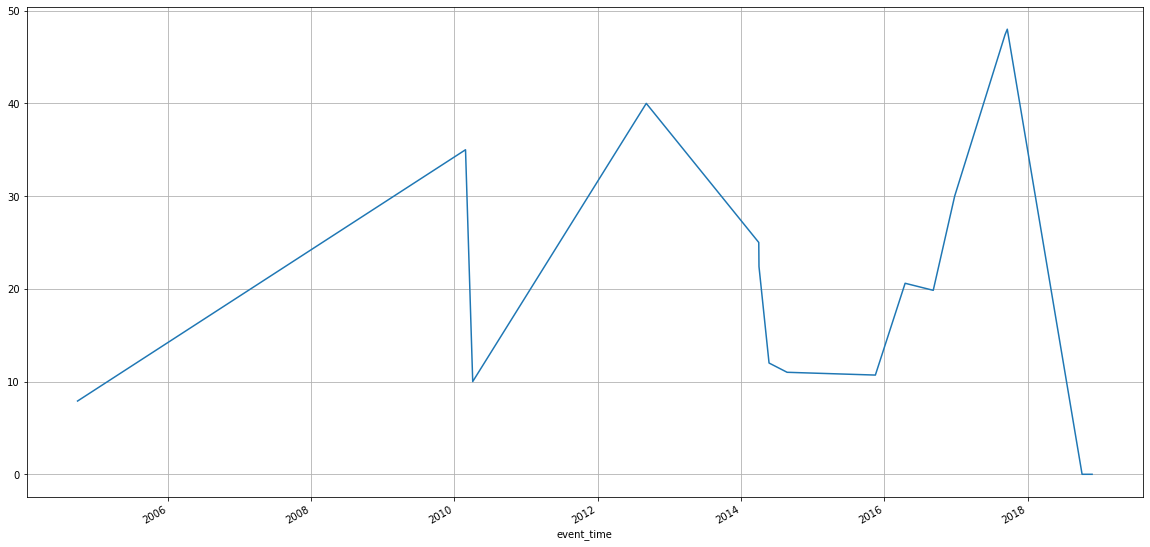

In [17]:
d_2015=dg.loc['2004-09-28':'2018-11-26']
d_2015_mg=d_2015['event_depth']
d_2015_mg.plot(grid=True,figsize=(20,10))

In [18]:
le=LabelEncoder()
data_gps['station']=le.fit_transform(data_gps['station'])

In [19]:
sc=StandardScaler()
scale=['event_magnitude','event_latitude','event_longitude','event_depth','mts_id','station','station_latitude','station_longitude','timestamp','dimension_E','dimension_N','dimension_Z']
data_gps[scale]=sc.fit_transform(data_gps[scale])

In [20]:
data_gps['label']=le.fit_transform(data_gps['label'])

In [21]:
data_gps['label'].value_counts()

1    85440
0    38880
Name: label, dtype: int64

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

In [23]:
x=data_gps.drop(columns=['label','event_time','timestamp','dimension_E','dimension_N','dimension_Z','mts_id','event_id'],axis=1)
y=data_gps['label']

In [33]:
x

,event_magnitude,event_latitude,event_longitude,event_depth,station,station_latitude,station_longitude
0,1.132202,1.556964,-1.751327,0.251970,0.512209,1.585800,-1.754921
1,1.132202,1.556964,-1.751327,0.251970,0.512209,1.585800,-1.754921
2,1.132202,1.556964,-1.751327,0.251970,0.512209,1.585800,-1.754921
3,1.132202,1.556964,-1.751327,0.251970,0.512209,1.585800,-1.754921
4,1.132202,1.556964,-1.751327,0.251970,0.512209,1.585800,-1.754921
...,...,...,...,...,...,...,...
124315,-0.666313,-0.339987,0.626801,-0.552686,0.414140,-0.370335,0.624686
124316,-0.666313,-0.339987,0.626801,-0.552686,0.414140,-0.370335,0.624686
124317,-0.666313,-0.339987,0.626801,-0.552686,0.414140,-0.370335,0.624686
124318,-0.666313,-0.339987,0.626801,-0.552686,0.414140,-0.370335,0.624686


In [24]:
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [25]:
model.feature_importances_

array([0.38948451, 0.08036278, 0.1754893 , 0.09391792, 0.05925128,
       0.10007759, 0.10141661])

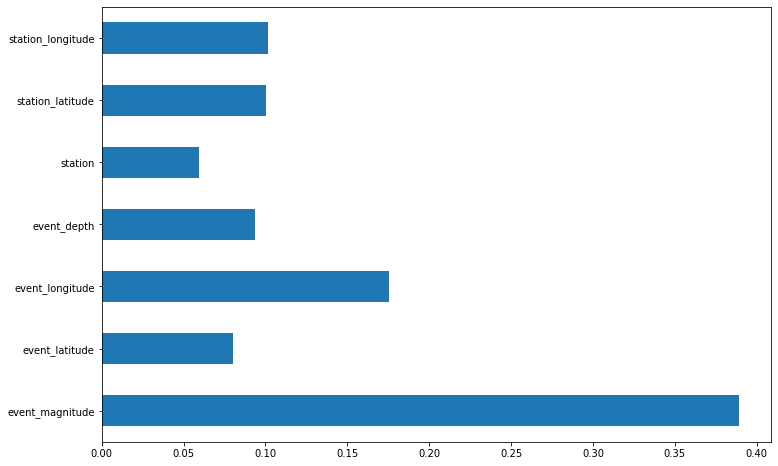

In [26]:
plt.figure(figsize=(12,8))
impft = pd.Series(model.feature_importances_, index=x.columns)
impft.plot(kind='barh')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
asc = accuracy_score(y_test,y_pred)

In [31]:
cm

array([[ 5876,     0],
       [    0, 12772]])

In [32]:
x_train.shape

(105672, 7)

In [34]:
test=[[-0.666313 ,-0.339987 ,0.626801 ,-0.552686 ,0.414140 ,-0.370335 ,0.624686]]
#sc.fit_transform(test)

In [35]:
classifier.predict(test)

array([1])

In [ ]:
y=y.to_numpy()
X=x.to_numpy()

from sklearn.model_selection import StratifiedKFold
acc=[]
stratified_k_fold = StratifiedKFold(n_splits=7, shuffle=True,random_state=10001)

for train_indices, test_indices in stratified_k_fold.split(X, y):
  x_trains=X[train_indices]
  y_trains=y[train_indices]
  x_tests=X[test_indices]
  y_tests=y[test_indices]

  x_trains = sc.fit_transform(x_trains)
  x_tests = sc.transform(x_tests)


  classifier = SVC(kernel = 'rbf',C=1,gamma=0.5)
  classifier.fit(x_trains, y_trains)
  y_pred = classifier.predict(x_tests)
  accuracy2=accuracy_score(y_tests,y_pred)*100
  acc.append(accuracy2)
  print(accuracy2)

100.0
100.0
100.0
100.0
100.0
100.0
100.0
